In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# Load the dataset (replace with the actual dataset path)
train = pd.read_csv("Week7_train.csv")


In [15]:
# Check shape of the data
print("Shape of dataset:", train.shape)


Shape of dataset: (42000, 785)


In [35]:
# Select only 10% of the data
train_sampled = train.sample(frac=0.1, random_state=42)
print("Shape of sampled dataset:", train_sampled.shape)

Shape of sampled dataset: (4200, 785)


In [36]:
# Look at the top 5 rows
print(train_sampled.head())


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
5457       8       0       0       0       0       0       0       0       0   
38509      1       0       0       0       0       0       0       0       0   
25536      9       0       0       0       0       0       0       0       0   
31803      9       0       0       0       0       0       0       0       0   
39863      8       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
5457        0  ...         0         0         0         0         0   
38509       0  ...         0         0         0         0         0   
25536       0  ...         0         0         0         0         0   
31803       0  ...         0         0         0         0         0   
39863       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
5457          0         0   

In [18]:
# Find the number of unique class labels
unique_labels = train_sampled["label"].unique()
print("Unique class labels:", unique_labels)
print("Number of unique class labels:", len(unique_labels))


Unique class labels: [8 1 9 6 2 7 3 4 5 0]
Number of unique class labels: 10


In [19]:

# Print the number of examples for each class label
print(train_sampled["label"].value_counts())


label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64


In [20]:
# Prepare X (features) and y (labels)
X = train_sampled.drop(columns=["label"])
y = train_sampled["label"]



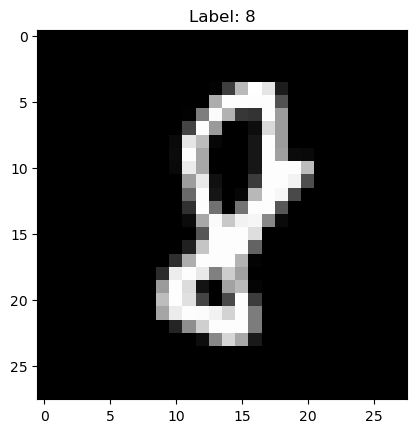

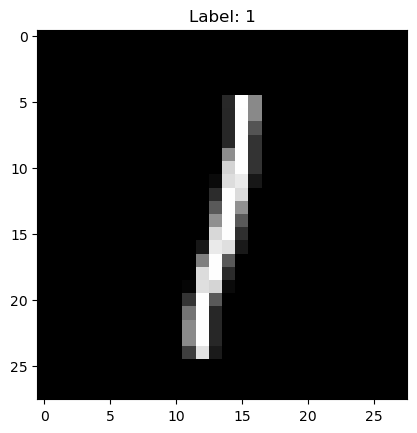

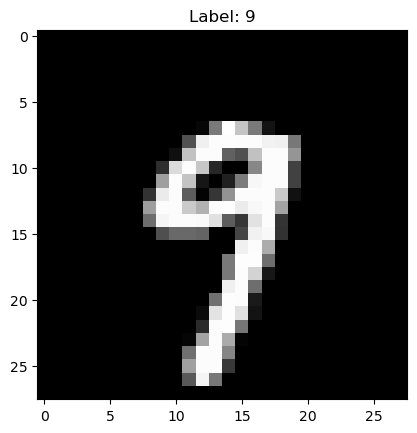

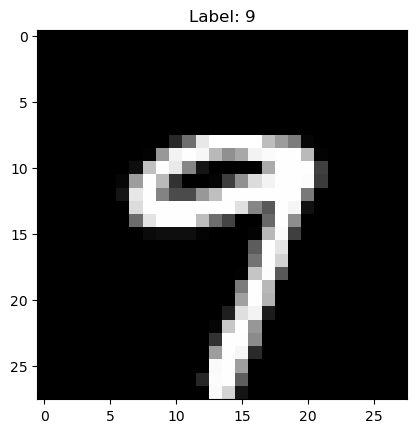

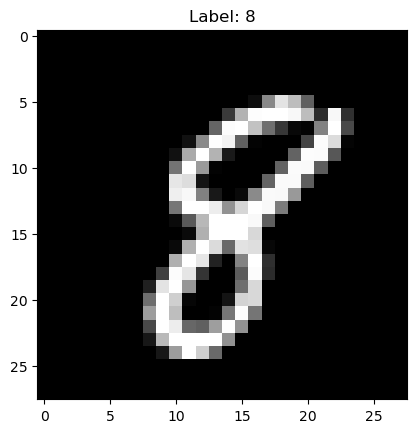

In [21]:
# Visualize the first 5 images in X with their labels (assuming 28x28 images)
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")  
    plt.title(f"Label: {y.iloc[i]}")
    plt.show()


In [22]:
# Split dataset into training (75%) and validation (25%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)


In [23]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [24]:
# Predict on validation set
y_pred = knn.predict(X_val)


In [25]:
# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Confusion Matrix:
 [[ 97   0   0   1   0   1   2   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   6  81   0   0   0   0   3   0   0]
 [  0   0   1 122   0   4   0   1   1   3]
 [  0   0   0   0  88   0   2   0   0   5]
 [  0   1   0   2   0  80   1   1   0   0]
 [  0   1   0   0   0   0  98   0   0   0]
 [  0   9   1   0   0   0   0 104   0   4]
 [  0   5   1   3   0   1   2   2  89   3]
 [  1   2   0   1   3   0   0   5   0  94]]


In [26]:
# Print classification report and accuracy
print("Classification Report:\n", classification_report(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050



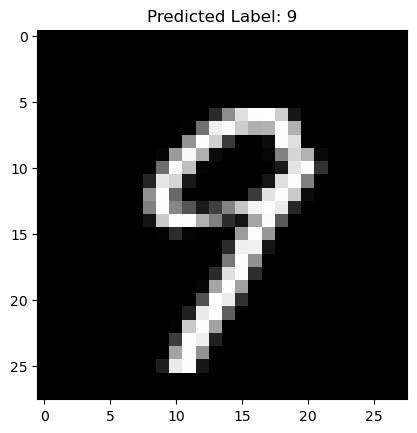

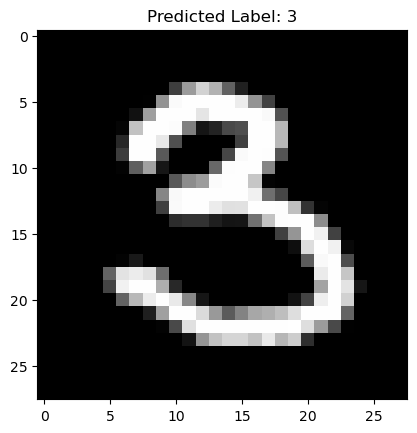

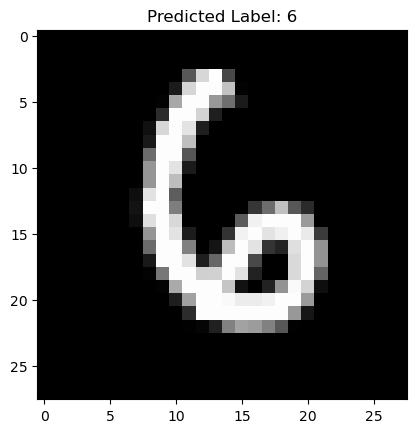

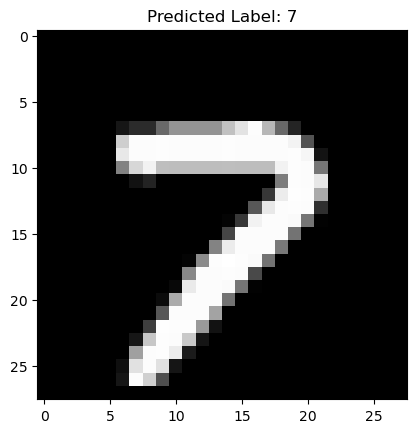

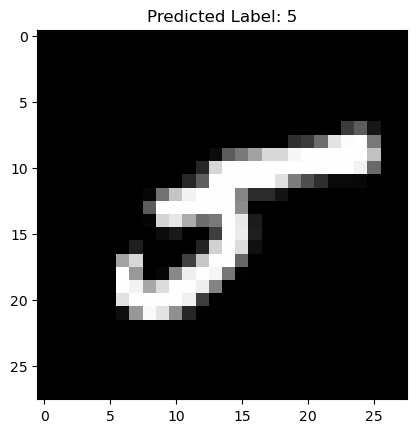

In [34]:
# Visualize the first 5 test images with their predicted labels
for i in range(5):
    plt.imshow(X_val.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(f"Predicted Label: {y_pred[i]}")
    plt.show()  # Make sure this line does not contain a non-breaking space